In [8]:
# required for timing functions
from __future__ import print_function, division
# basic python includes 
import struct
import os
import math
import inspect
import re
import timeit
import time
from contextlib import contextmanager
from functools import partial
# numpy and some basic functions
import numpy as np
from numpy import pi, exp, sqrt
# imports required for 2d and 3d plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
from mpl_toolkits.axes_grid1 import make_axes_locatable
#scipy optimization functions
from scipy import optimize
from scipy.spatial import ConvexHull
from scipy.interpolate import griddata
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import SR1
from scipy.integrate import dblquad
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
from numpy import sin, cos, tan, log, arcsin, arccos, sqrt
from bqplot import *
import pandas as pd
from tqdm.notebook import trange, tqdm
import random
import warnings
import yaml
%matplotlib notebook
warnings.filterwarnings(action='once')
import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
%matplotlib notebook
import torch

/home/winchenbach/anaconda3/envs/torch_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:359: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.switch_backend(backend)


In [2]:
colCycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:

n = 16
dx = 2/n

centers = np.linspace(-1,1,n,endpoint = False) + dx / 2

# weights = np.random.uniform(size=n) * 2 - 1
weights = np.random.normal(size=n, loc = 0, scale = 1/np.sqrt(2))
# weights[:] = 1

weights = (weights - np.sum(weights) / n)/np.std(weights)

print(np.sum(weights), np.std(weights))

-2.220446049250313e-16 1.0


<IPython.core.display.Javascript object>


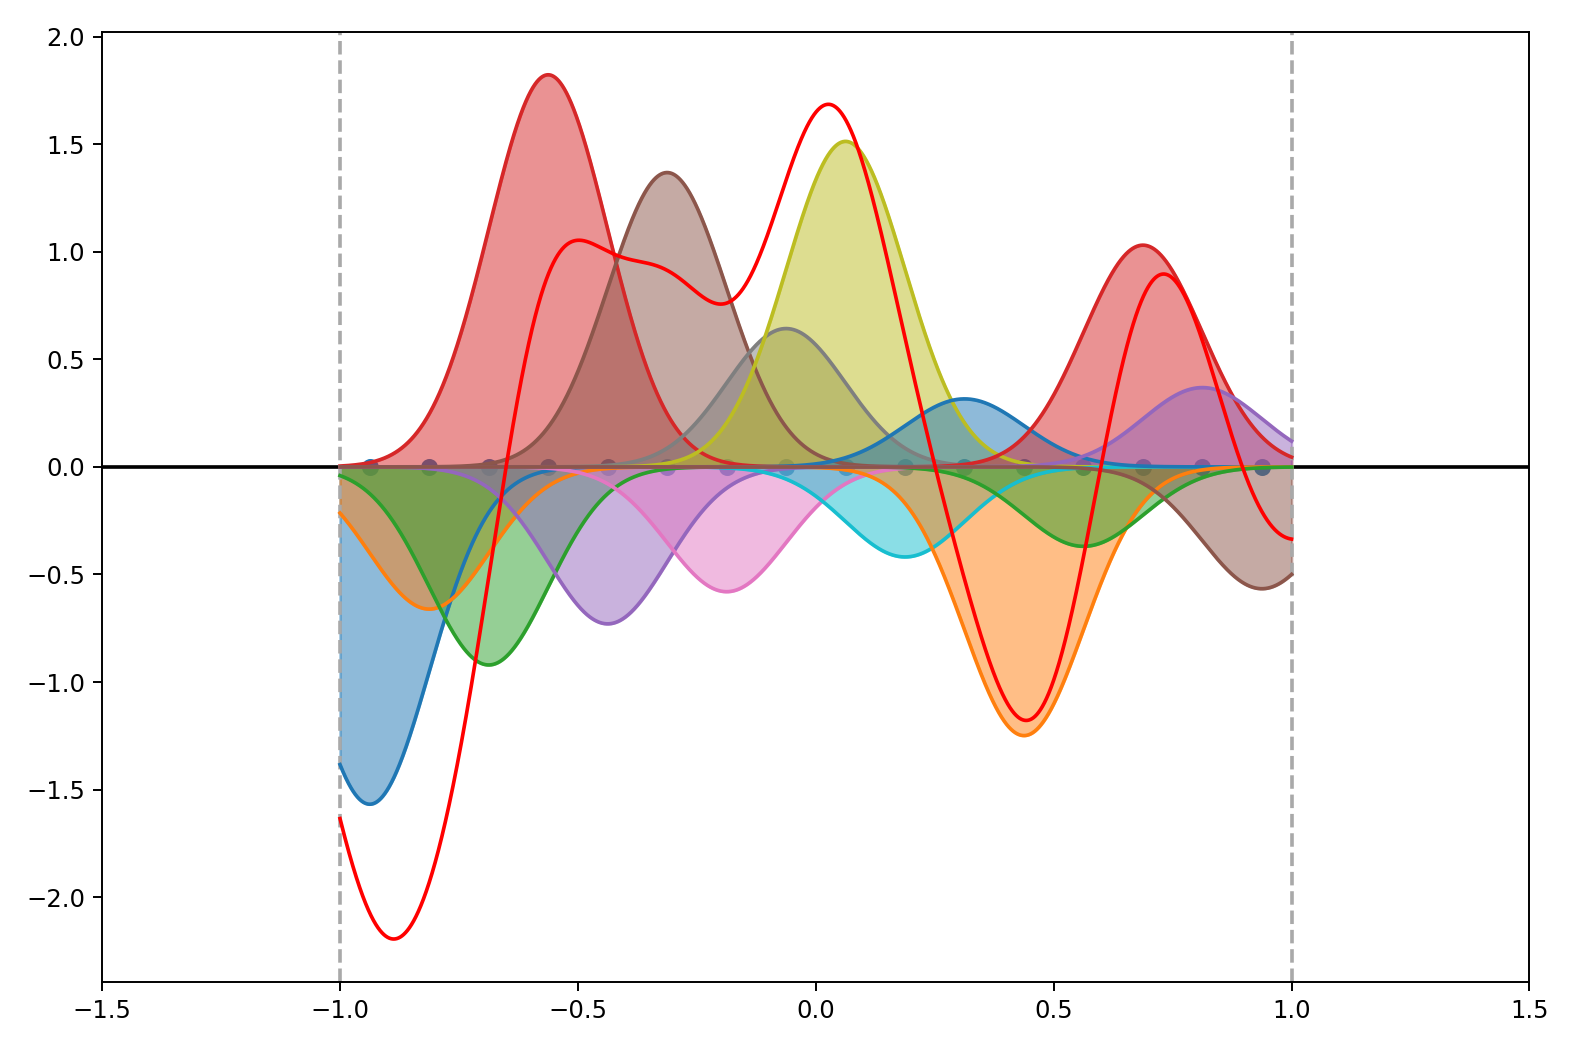

[-1.56801687 -0.66105065 -0.92068072  1.82273626 -0.72960107  1.36820644
 -0.58008839  0.64301783  1.51312856 -0.4186416   0.31612682 -1.24898839
 -0.36919942  1.03070718  0.36866918 -0.56632517]
[-0.9375 -0.8125 -0.6875 -0.5625 -0.4375 -0.3125 -0.1875 -0.0625  0.0625
  0.1875  0.3125  0.4375  0.5625  0.6875  0.8125  0.9375]


In [4]:
fig, axis = plt.subplots(1,1, figsize=(9,6), sharex = True, sharey = False, squeeze = False)

print(weights)

print(centers)

axis[0,0].scatter(centers,centers * 0)
axis[0,0].set_xlim(-1.5, 1.5)
axis[0,0].axvline(-1, ls= '--', color ='darkgrey')
axis[0,0].axvline(1,ls= '--', color ='darkgrey')
axis[0,0].axhline(0, color = 'black')

sigma = 2/(n)


nx = 32 * 1024
x = np.linspace(-1,1, nx)
fns = []
for c in centers:
     fns.append(np.exp(-1/2 *(x - c)**2 / sigma**2))

        
        
for i, fx in enumerate(fns):
    axis[0,0].plot(x, weights[i] * fx, color = colCycle[i%len(colCycle)])
    axis[0,0].fill_between(x,weights[i] * fx,alpha=0.5, color = colCycle[i%len(colCycle)])

fsum = 0
for i, fx in enumerate(fns):
    fsum += weights[i] * np.exp(-1/2 *(x - centers[i])**2 / sigma**2)
axis[0,0].plot(x,fsum, color='red')
# axis[0,0].plot(x,np.abs(fsum), color='blue')
# axis[0,0].fill_between(x,fsum,alpha=0.5, color = 'red')

fsum = 0
for i, fx in enumerate(fns):
    fsum += np.abs(weights[i] * np.exp(-1/2 *(x - centers[i])**2 / sigma**2))
# axis[0,0].plot(x,fsum, color='green')
# axis[0,0].plot(x,np.abs(fsum), color='green')
# axis[0,0].fill_between(x,fsum,alpha=0.5, color = 'red')
    
fig.tight_layout()

In [5]:
import scipy.special

In [6]:
def antiDerivative(x, mu, sigma):
    a = 1 / (sigma * np.sqrt(2 * np.pi))
    b = - np.sqrt(np.pi/2)
    c = sigma
    d = scipy.special.erf((mu - x) / (np.sqrt(2) * sigma))
    return b * c * d

integrals = []
for c in centers:
#     print(c)
    integral = antiDerivative(1, c, sigma) - antiDerivative(-1, c, sigma)
    integrals.append(integral)
# print(integrals)

integralSum = 0
wSum = 0
for w,i in zip(weights,integrals):
    integralSum += w * i
    wSum += w
print(integralSum)
print(wSum)

0.2121369393323399
0.0


tensor([ 0.6065, -0.8610,  0.7262,  ...,  0.8008, -0.6119,  0.7428],
       device='cuda:0') tensor([7.3908e-34, 8.2905e-01, 3.4260e-39,  ..., 1.0117e-42, 3.3644e-02,
        5.7806e-40], device='cuda:0')
torch.Size([131072]) torch.Size([131072])
tensor(0.2168, device='cuda:0')
0.216654919534423
tensor(1.0007, device='cuda:0')


<IPython.core.display.Javascript object>


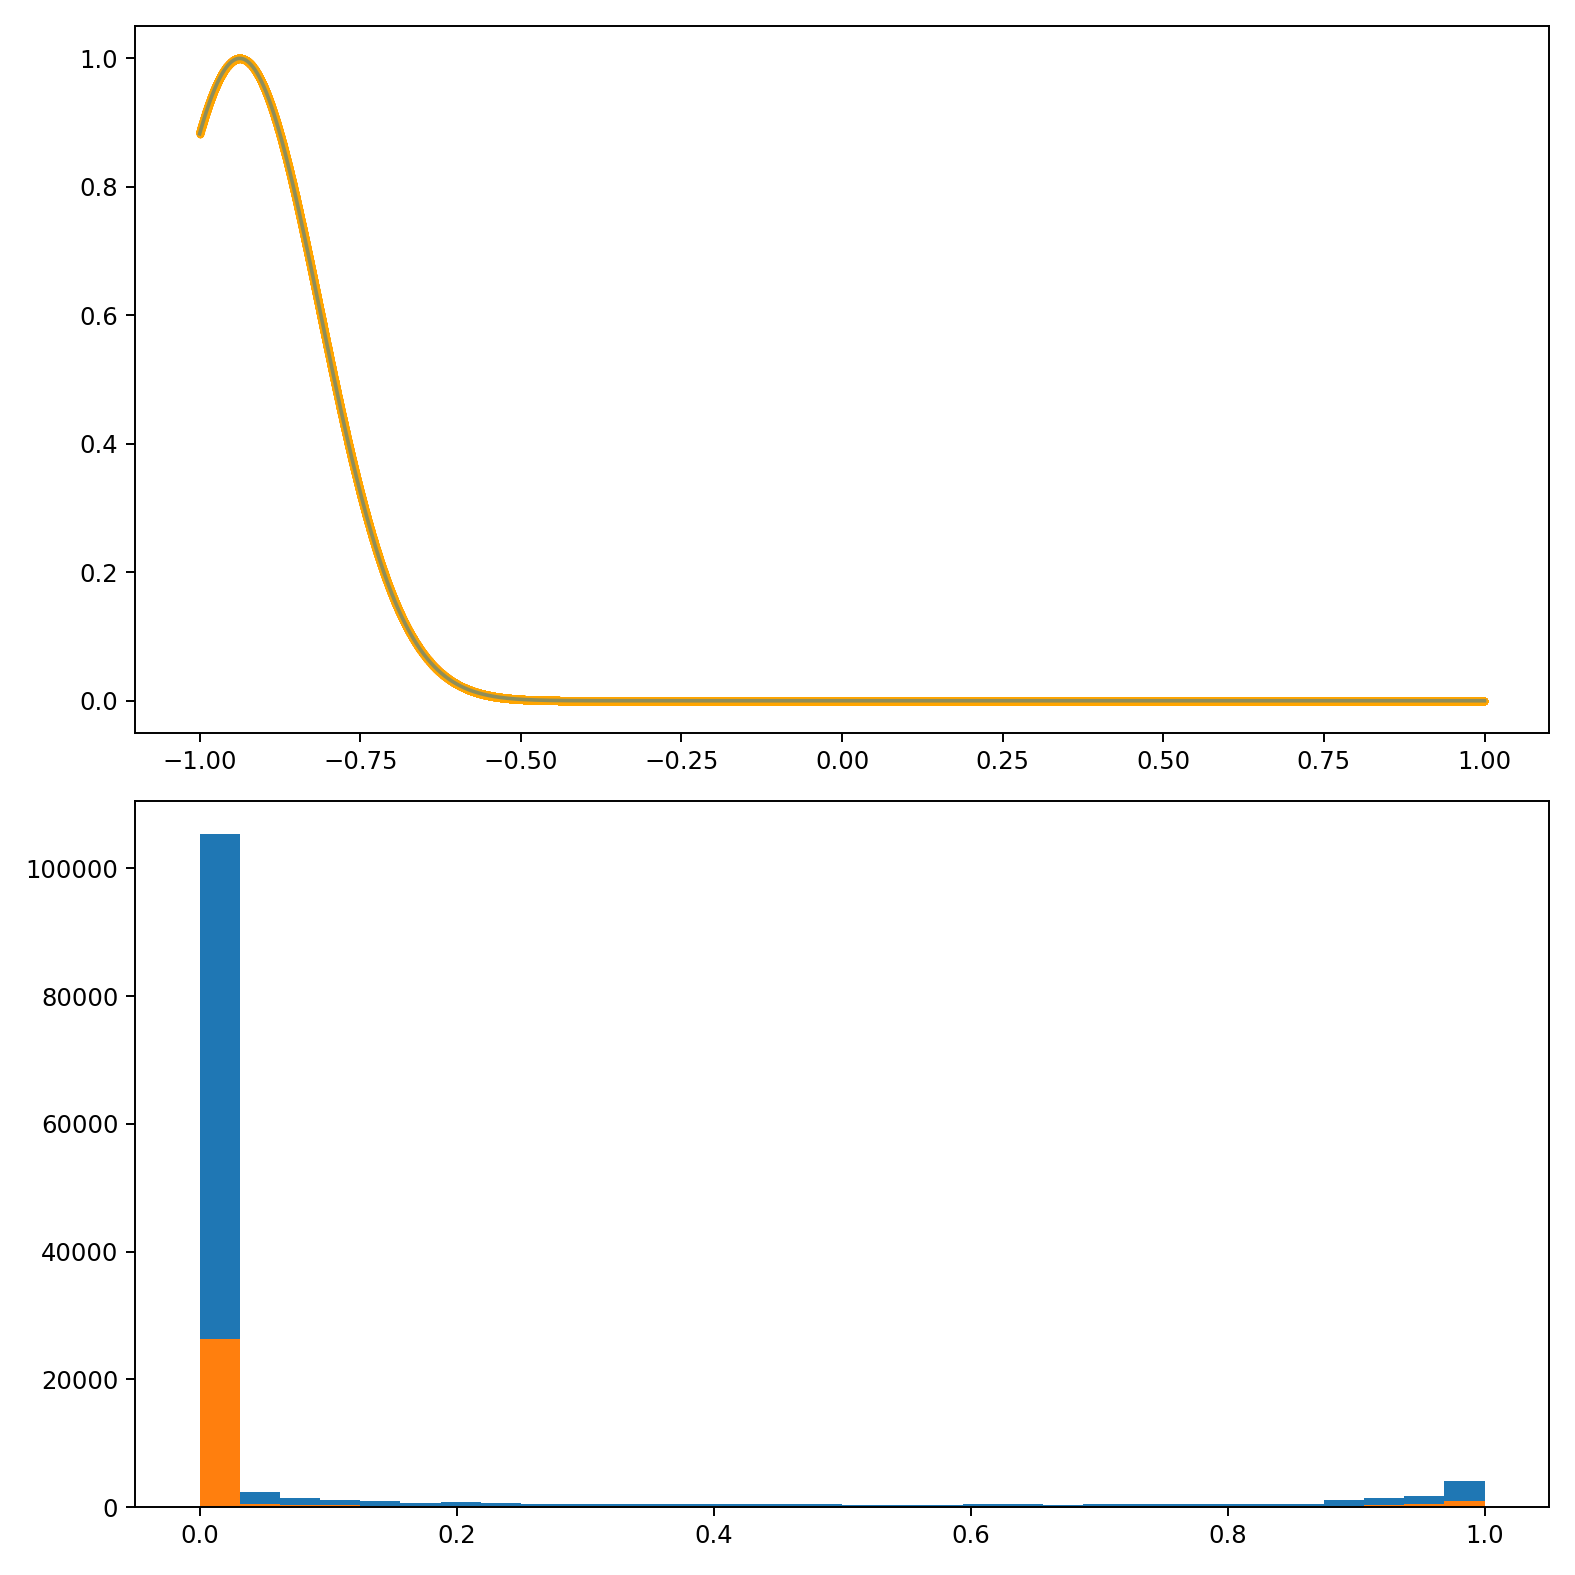

In [9]:
nmc = 128 * 1024
xmc = torch.rand((nmc), dtype=torch.float32, device='cuda') * 2 - 1
centers_gpu = torch.from_numpy(centers).to('cuda').type(torch.float32)

fmc = torch.exp(-1/2 *(xmc - centers_gpu[0])**2 / sigma**2)

print(xmc, fmc)
print(xmc.shape, fmc.shape)

fintegral = 2 / nmc * torch.sum(fmc)

print(fintegral)
print(integrals[0])
print(fintegral / integrals[0])

fig, axis = plt.subplots(2,1, figsize=(9,9), sharex = False, sharey = False, squeeze = False)

axis[0,0].plot(x, fns[0],alpha = 0.5)
axis[0,0].scatter(xmc.detach().cpu().numpy(),fmc.detach().cpu().numpy(), s = 4, c ='orange')

axis[1,0].hist(fmc.detach().cpu().numpy(), bins = 32)
axis[1,0].hist(fns[0], bins = 32)


fig.tight_layout()

In [10]:
weights * integrals

array([-0.33971857, -0.19328852, -0.2866842 ,  0.57098242, -0.22860406,
        0.42869811, -0.18175824,  0.20147583,  0.47410635, -0.13117236,
        0.09905155, -0.39134237, -0.1156538 ,  0.32094456,  0.10779737,
       -0.12269713])

In [11]:
import scipy.optimize

In [12]:
np.eye(len(weights)).dot(weights)

array([-1.56801687, -0.66105065, -0.92068072,  1.82273626, -0.72960107,
        1.36820644, -0.58008839,  0.64301783,  1.51312856, -0.4186416 ,
        0.31612682, -1.24898839, -0.36919942,  1.03070718,  0.36866918,
       -0.56632517])

In [13]:
eps = 1e-2
sumConstraint = scipy.optimize.NonlinearConstraint(fun = np.sum, lb = -eps, ub = eps)
stdConstraint = scipy.optimize.NonlinearConstraint(fun = np.std, lb = 1 - eps, ub = 1 + eps)

In [14]:
eps = 1e-2
sumConstraint = scipy.optimize.NonlinearConstraint(fun = np.sum, lb = -eps, ub = eps)
stdConstraint = scipy.optimize.NonlinearConstraint(fun = np.std, lb = 1 - eps, ub = 1 + eps)
res = scipy.optimize.minimize(lambda x: (np.sum(x * integrals))**2, weights, \
                              method ='trust-constr', constraints = [sumConstraint, stdConstraint],\
                              options={'verbose': 1})
print(res.x)
print(np.sum(res.x * integrals))
print(np.sum(res.x))
print(np.std(res.x))
# print(res)

`gtol` termination condition is satisfied.
Number of iterations: 19, function evaluations: 204, CG iterations: 18, optimality: 2.88e-09, constraint violation: 0.00e+00, execution time: 0.051 s.
[-0.53411676 -0.64091598 -1.20554838  1.79208715 -1.02331292  1.28945193
 -0.85843312  0.49010858  1.44957567 -0.68056386  0.13018247 -1.59593711
 -0.62487056  0.94861324  0.49352732  0.57006397]
1.3568855539158875e-08
-8.83411997618655e-05
1.0010999798339166


<IPython.core.display.Javascript object>


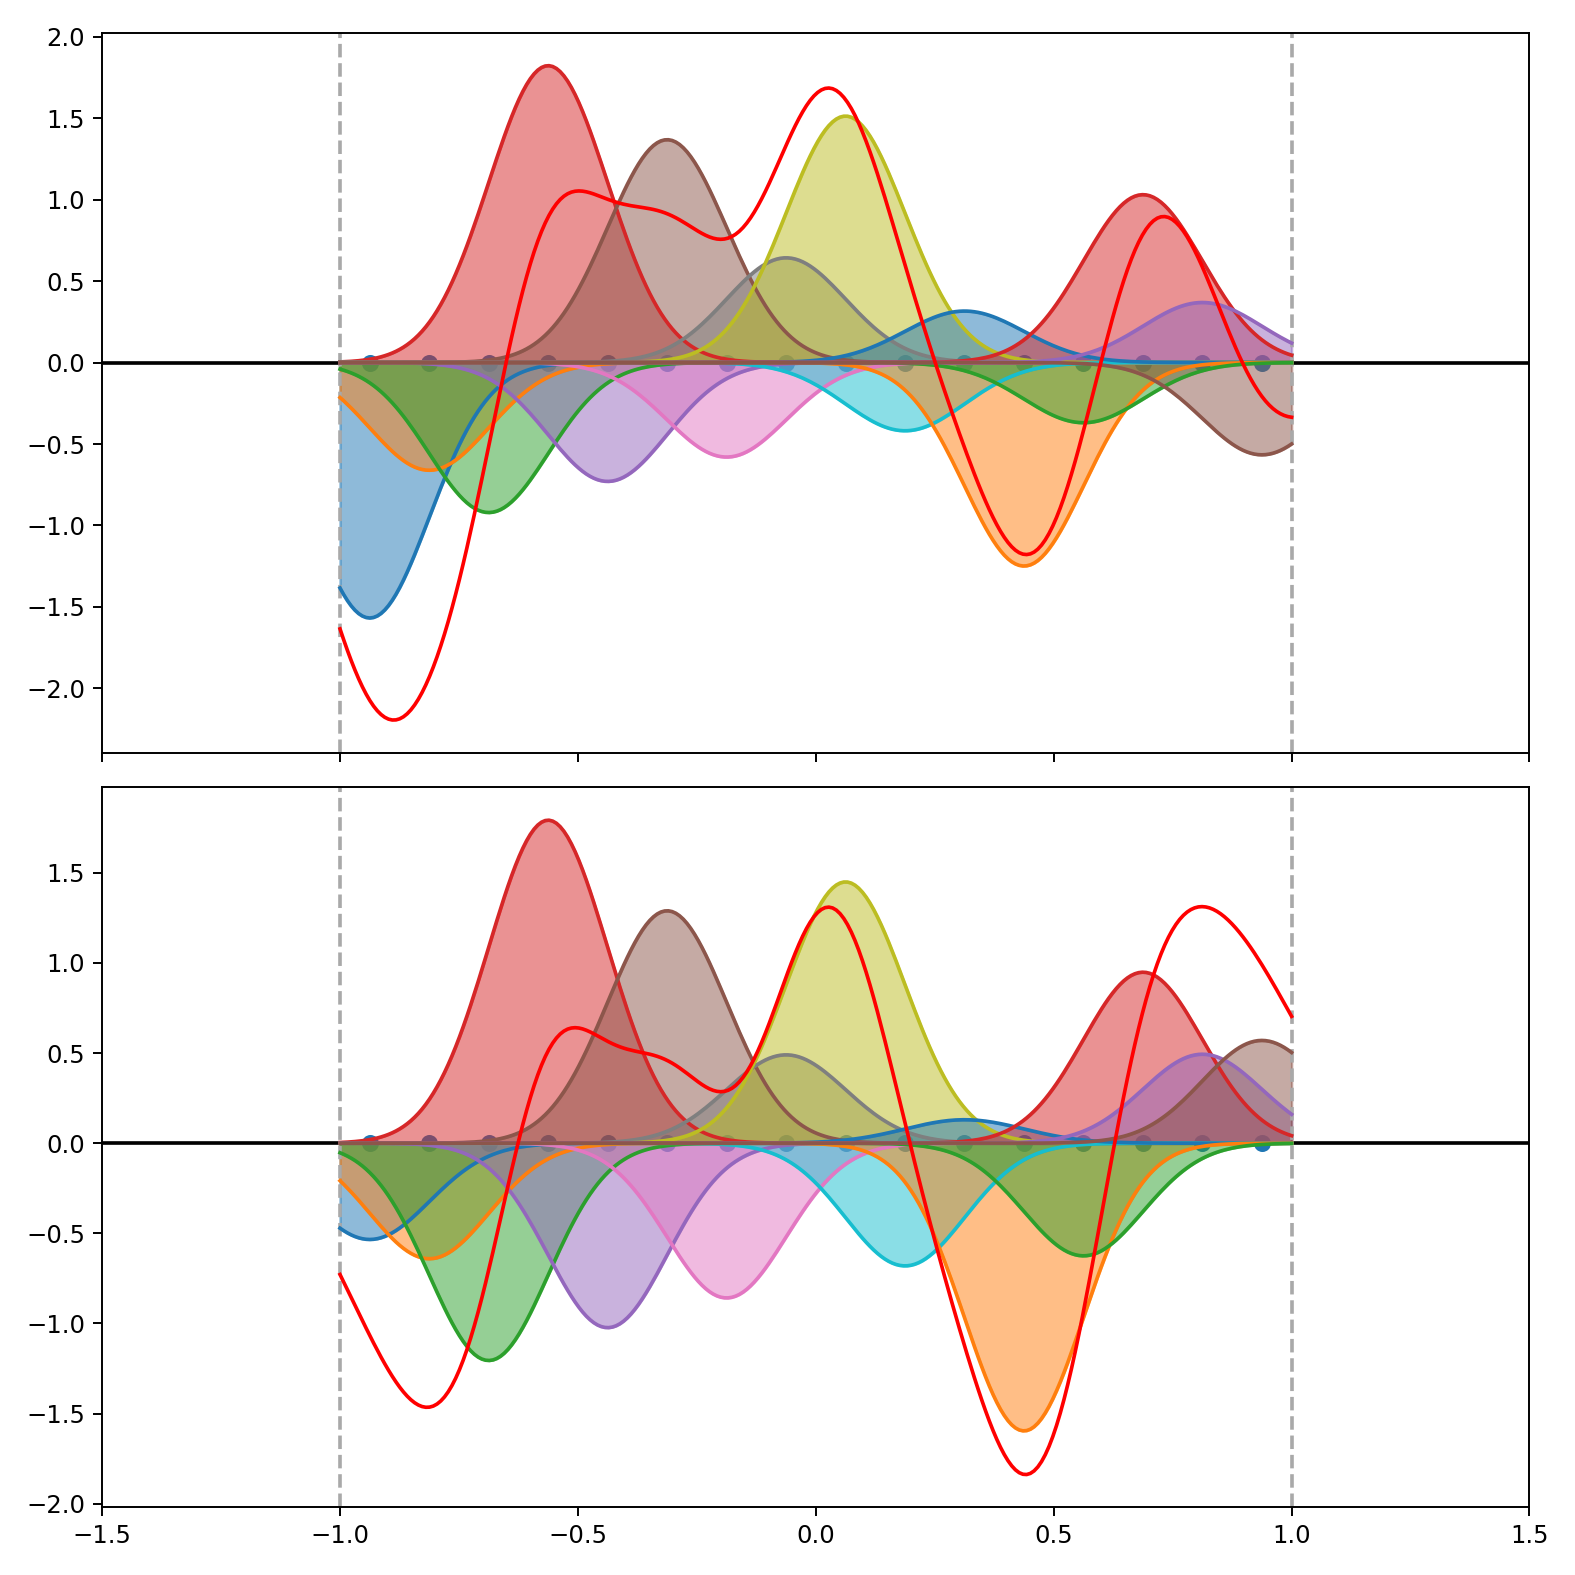

[-1.56801687 -0.66105065 -0.92068072  1.82273626 -0.72960107  1.36820644
 -0.58008839  0.64301783  1.51312856 -0.4186416   0.31612682 -1.24898839
 -0.36919942  1.03070718  0.36866918 -0.56632517]
[-0.9375 -0.8125 -0.6875 -0.5625 -0.4375 -0.3125 -0.1875 -0.0625  0.0625
  0.1875  0.3125  0.4375  0.5625  0.6875  0.8125  0.9375]


In [15]:
fig, axis = plt.subplots(2,1, figsize=(9,9), sharex = True, sharey = False, squeeze = False)

print(weights)

print(centers)

axis[0,0].scatter(centers,centers * 0)
axis[0,0].set_xlim(-1.5, 1.5)
axis[0,0].axvline(-1, ls= '--', color ='darkgrey')
axis[0,0].axvline(1,ls= '--', color ='darkgrey')
axis[0,0].axhline(0, color = 'black')



nx = 256
x = np.linspace(-1,1, nx)
fns = []
for c in centers:
     fns.append(np.exp(-1/2 *(x - c)**2 / sigma**2))

        
        
for i, fx in enumerate(fns):
    axis[0,0].plot(x, weights[i] * fx, color = colCycle[i%len(colCycle)])
    axis[0,0].fill_between(x,weights[i] * fx,alpha=0.5, color = colCycle[i%len(colCycle)])

fsum = 0
for i, fx in enumerate(fns):
    fsum += weights[i] * np.exp(-1/2 *(x - centers[i])**2 / sigma**2)
axis[0,0].plot(x,fsum, color='red')
# axis[0,0].plot(x,np.abs(fsum), color='blue')
# axis[0,0].fill_between(x,fsum,alpha=0.5, color = 'red')

axis[1,0].scatter(centers,centers * 0)
axis[1,0].set_xlim(-1.5, 1.5)
axis[1,0].axvline(-1, ls= '--', color ='darkgrey')
axis[1,0].axvline(1,ls= '--', color ='darkgrey')
axis[1,0].axhline(0, color = 'black')



nx = 256
x = np.linspace(-1,1, nx)
fns = []
for c in centers:
     fns.append(np.exp(-1/2 *(x - c)**2 / sigma**2))

        
        
for i, fx in enumerate(fns):
    axis[1,0].plot(x, res.x[i] * fx, color = colCycle[i%len(colCycle)])
    axis[1,0].fill_between(x,res.x[i] * fx,alpha=0.5, color = colCycle[i%len(colCycle)])

fsum = 0
for i, fx in enumerate(fns):
    fsum += res.x[i] * np.exp(-1/2 *(x - centers[i])**2 / sigma**2)
axis[1,0].plot(x,fsum, color='red')
# axis[0,0].plot(x,np.abs(fsum), color='blue')
# axis[0,0].fill_between(x,fsum,alpha=0.5, color = 'red')

    
fig.tight_layout()

In [16]:
print(np.sum(res.x * integrals))

1.3568855539158875e-08


In [17]:

nx = 4
dx = 2/nx
ny = 4
dy = 2/ny

xx = np.linspace(-1,1,nx,endpoint = False) + dx / 2
yy = np.linspace(-1,1,ny,endpoint = False) + dy / 2

xv, yv = np.meshgrid(xx,yy)
centers = np.vstack((xv.flatten(), yv.flatten())).T

weights = np.random.normal(size=nx * ny, loc = 0, scale = 1/np.sqrt(2))
weights = (weights - np.sum(weights) / n)/np.std(weights)


# centers = np.array([, np.linspace(-1,1,ny,endpoint = False) + dy / 2]).T

# print(xx,yy,centers)

In [18]:
print(sigma)

0.125


<IPython.core.display.Javascript object>


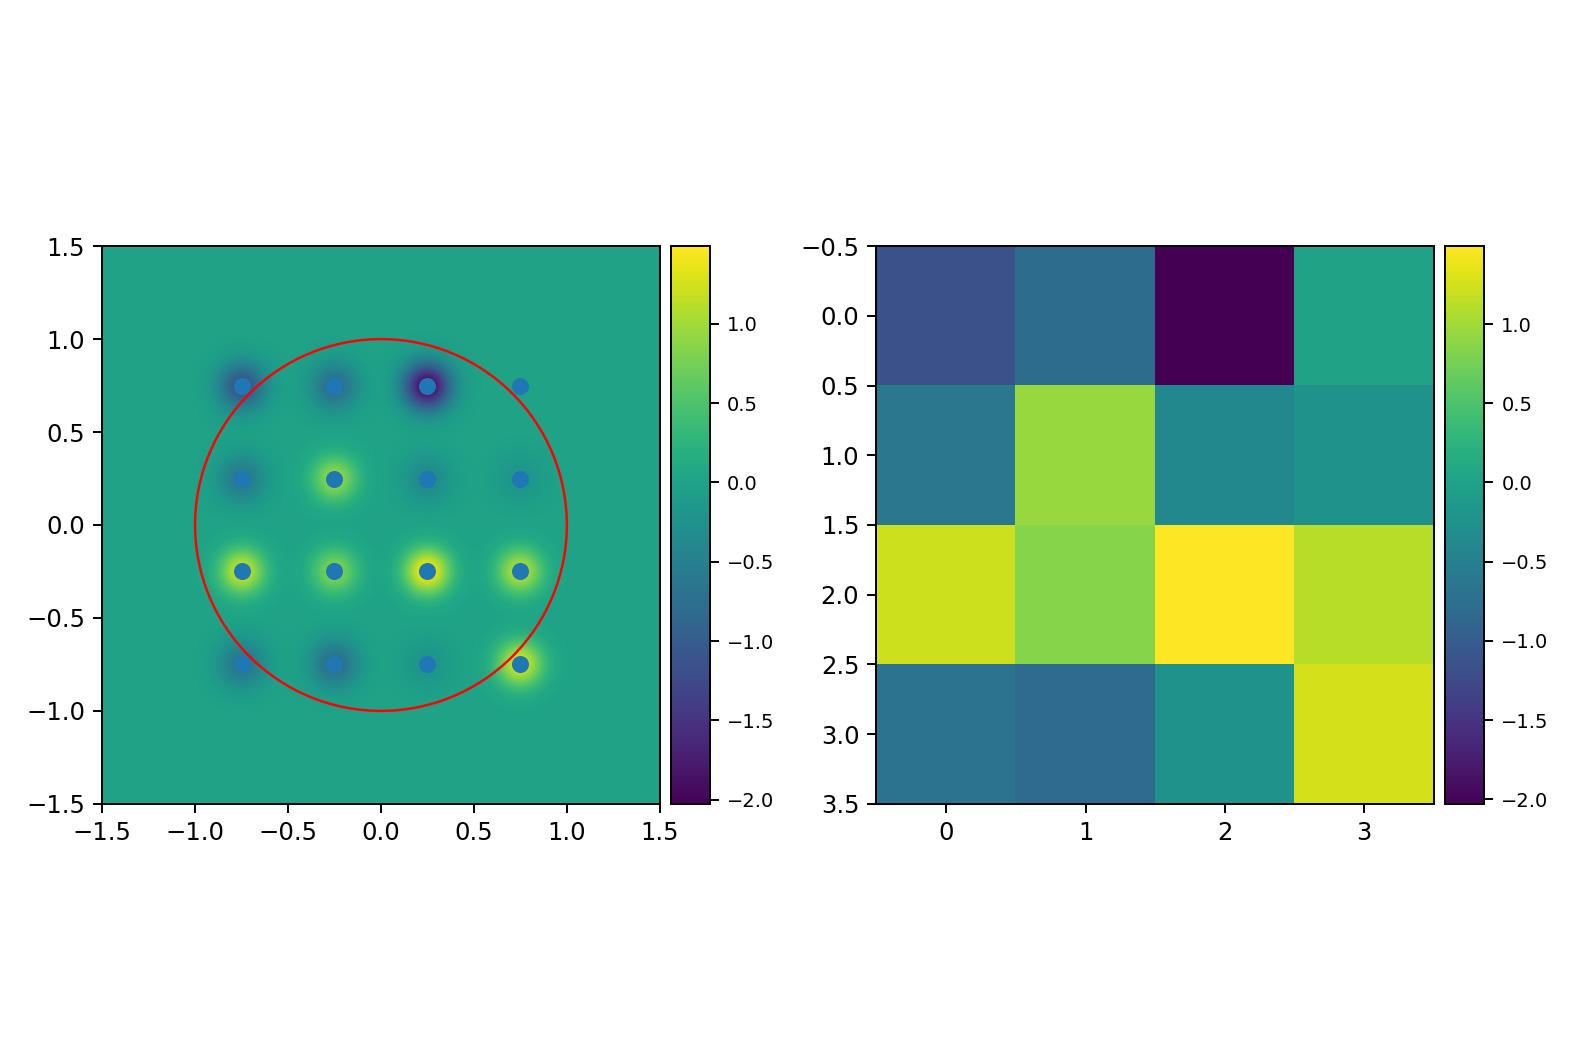

(256, 256)


In [89]:
nx = 8
dx = 2/nx
ny = 8
dy = 2/ny

xx = np.linspace(-1,1,nx,endpoint = False) + dx / 2
yy = np.linspace(-1,1,ny,endpoint = False) + dy / 2

xv, yv = np.meshgrid(xx,yy)
centers = np.vstack((xv.flatten(), yv.flatten())).T

weights = np.random.normal(size=nx * ny, loc = 0, scale = 1/np.sqrt(2))
weights = (weights - np.sum(weights) / n)/np.std(weights)

sigma = 0.5

torch_centers = torch.from_numpy(centers).to('cuda').type(torch.float32)
torch_weights = torch.from_numpy(weights).to('cuda').type(torch.float32)

<IPython.core.display.Javascript object>


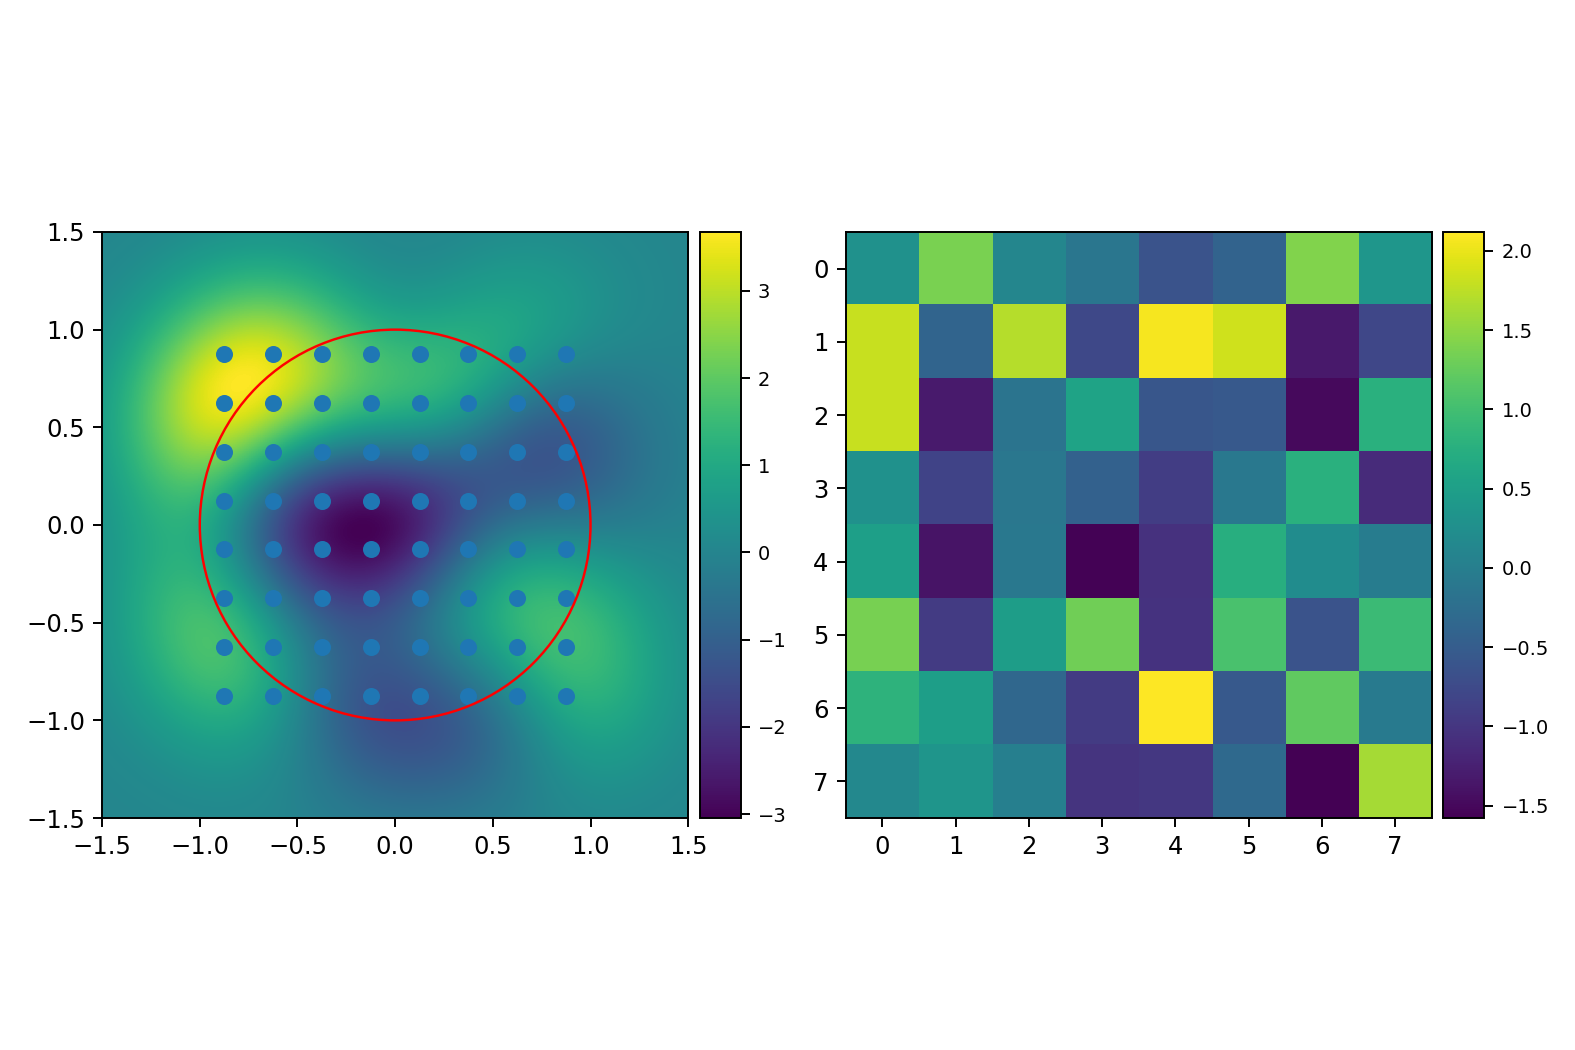

(256, 256)


In [90]:
fig, axis = plt.subplots(1,2, figsize=(9,6), sharex = False, sharey = False, squeeze = False)

axis[0,0].scatter(centers[:,0], centers[:,1])

axis[0,0].axis('equal')
axis[0,0].set_xlim(-1.5, 1.5)
axis[0,0].set_ylim(-1.5, 1.5)

circle1 = plt.Circle((0, 0), 1., color='r', fill = False)
axis[0,0].add_patch(circle1)


xx = np.linspace(-1.5,1.5,256)
yy = np.linspace(-1.5,1.5,256)

xv, yv = np.meshgrid(xx,yy)

Z = np.zeros((256,256))
for w,c in zip(weights, centers):
    Z = Z + w * np.exp(-(xv-c[0])**2/sigma**2) * np.exp(-(yv-c[1])**2/sigma**2)
#     break

print(Z.shape)

im = axis[0,0].imshow(Z, extent = [-1.5,1.5,-1.5,1.5])

ax1_divider = make_axes_locatable(axis[0,0])
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
cbar = fig.colorbar(im, cax=cax1,orientation='vertical')
cbar.ax.tick_params(labelsize=8) 

imw = axis[0,1].imshow(weights.reshape(nx,ny))
ax1_divider = make_axes_locatable(axis[0,1])
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
cbar = fig.colorbar(imw, cax=cax1,orientation='vertical')
cbar.ax.tick_params(labelsize=8) 

fig.tight_layout()

In [113]:
def optimizeWeights(weights, nmc = 1024*32, windowFn = None, targetIntegral = 1, verbose = False):
    r = torch.sqrt(torch.rand(size=(nmc,1)).to('cuda').type(torch.float32))
    theta = torch.rand(size=(nmc,1)).to('cuda').type(torch.float32) *2 * np.pi

    x = r * torch.cos(theta)
    y = r * torch.sin(theta)

    baseIntegrals = []
    for i, (w,c) in enumerate(zip(torch_weights,torch_centers)):
        baseIntegral = torch.exp(-(x-c[0])**2/sigma**2) * torch.exp(-(y-c[1])**2/sigma**2)
        baseIntegral[x**2 + y**2 > 1] = 0
        baseIntegrals.append(baseIntegral.flatten())
    baseIntegrals = torch.stack(baseIntegrals)

    shapeFunction = torch.tensor(1).to('cuda').type(torch.float32) if windowFn is None else windowFn(torch.sqrt(x**2 + y**2))
    shapeFunction = shapeFunction.flatten()
    

    def evalFn(weights):
        wSum = weights[:,None] * baseIntegrals
        wSum = torch.sum(wSum, dim = 0)
#         return wSum
        return wSum * shapeFunction
    #     print(wSum.shape)
#     targetIntegral = 1
    def integrate(x):
        res = (np.pi * torch.sum(evalFn(torch.from_numpy(x).to('cuda').type(torch.float32)))/nmc).cpu().item()
    #     print(res)

        return (res - targetIntegral)**2

    tweights = torch.from_numpy(weights).to('cuda').type(torch.float32)
    fn = evalFn(tweights)

    if integrate(weights) < 0:
        weights = -weights

#     print(integrate(weights))

    eps = 1e-2
    sumConstraint = scipy.optimize.NonlinearConstraint(fun = np.sum, lb = -eps, ub = eps)
    stdConstraint = scipy.optimize.NonlinearConstraint(fun = np.std, lb = 1 - eps, ub = 1 + eps)
    res = scipy.optimize.minimize(lambda x: integrate(x) , weights, \
                                  method ='COBYLA', constraints = [sumConstraint, stdConstraint],\
                                  options={'verbose': 1})
    if verbose:
        print('initial weights', weights)
        print('result weights:',res.x)
        print('initial:', integrate(weights))
        print('integral:', integrate(res.x))
        print('sumConstraint:', np.sum(res.x))
        print('stdConstraint:', np.std(res.x))
    return res.x
    # print(res)

In [115]:
optimized = optimizeWeights(weights, targetIntegral = 1, nmc = 1024*16, windowFn = lambda r: 1-r**2, verbose = True)

initial weights [ 0.28783085  1.36961545  0.11498889 -0.12456042 -0.63604924 -0.39512748
  1.41543697  0.36685913  1.81120814 -0.38952379  1.71511967 -0.77204949
  2.07290979  1.85144487 -1.32398809 -0.78848231  1.81123093 -1.31346601
 -0.15921094  0.56707039 -0.59271395 -0.53986053 -1.48047649  0.76643197
  0.29591143 -0.83331275 -0.11706229 -0.43417773 -0.91379637 -0.09659728
  0.77195457 -1.12414455  0.5129577  -1.38313061 -0.09755357 -1.55121824
 -1.05195865  0.73603227  0.22615132 -0.02425752  1.36623298 -0.9312485
  0.48215403  1.31285806 -1.03846196  1.06374464 -0.62841643  0.94593958
  0.81052737  0.50125183 -0.34320931 -0.93274534  2.12014606 -0.54629112
  1.21679164 -0.07416304  0.14965445  0.34974642  0.0128922  -1.02568754
 -0.98254347 -0.31610721 -1.57907991  1.62244169]
result weights: [-6.85425388e-02  1.40290315e+00  2.98707573e-01  2.96527455e-01
 -2.12916639e-01 -4.16517923e-02  1.58877309e+00  3.13876982e-01
  1.63597647e+00  2.19824495e-01  2.20386132e+00  1.7365824

In [105]:
nmc = 1024 * 32

r = torch.sqrt(torch.rand(size=(nmc,1)).to('cuda').type(torch.float32))
theta = torch.rand(size=(nmc,1)).to('cuda').type(torch.float32) *2 * np.pi

x = r * torch.cos(theta)
y = r * torch.sin(theta)

baseIntegrals = []
for i, (w,c) in enumerate(zip(torch_weights,torch_centers)):
    baseIntegral = torch.exp(-(x-c[0])**2/sigma**2) * torch.exp(-(y-c[1])**2/sigma**2)
    baseIntegral[x**2 + y**2 > 1] = 0
    baseIntegrals.append(baseIntegral.flatten())
baseIntegrals = torch.stack(baseIntegrals)
print(baseIntegrals.shape)

shapeFunction = 1 - torch.sqrt(x**2 + y**2)**2
shapeFunction = shapeFunction.flatten()


def evalFn(weights):
    wSum = weights[:,None] * baseIntegrals
    wSum = torch.sum(wSum, dim = 0)
    return wSum
    return wSum * shapeFunction
#     print(wSum.shape)
targetIntegral = 1
def integrate(x):
    res = (np.pi * torch.sum(evalFn(torch.from_numpy(x).to('cuda').type(torch.float32)))/nmc).cpu().item()
#     print(res)
    
    return (res - targetIntegral)**2

tweights = torch.from_numpy(weights).to('cuda').type(torch.float32)
fn = evalFn(tweights)

if integrate(weights) < 0:
    weights = -weights

print(integrate(weights))

eps = 1e-2
sumConstraint = scipy.optimize.NonlinearConstraint(fun = np.sum, lb = -eps, ub = eps)
stdConstraint = scipy.optimize.NonlinearConstraint(fun = np.std, lb = 1 - eps, ub = 1 + eps)
res = scipy.optimize.minimize(lambda x: integrate(x) , weights, \
                              method ='COBYLA', constraints = [sumConstraint, stdConstraint],\
                              options={'verbose': 1})
print('initial weights', weights)
print('result weights:',res.x)
print('initial:', integrate(weights))
print('integral:', integrate(res.x))
print('sumConstraint:', np.sum(res.x))
print('stdConstraint:', np.std(res.x))
# print(res)

torch.Size([64, 32768])
2.4315031292233904
initial weights [ 0.28783085  1.36961545  0.11498889 -0.12456042 -0.63604924 -0.39512748
  1.41543697  0.36685913  1.81120814 -0.38952379  1.71511967 -0.77204949
  2.07290979  1.85144487 -1.32398809 -0.78848231  1.81123093 -1.31346601
 -0.15921094  0.56707039 -0.59271395 -0.53986053 -1.48047649  0.76643197
  0.29591143 -0.83331275 -0.11706229 -0.43417773 -0.91379637 -0.09659728
  0.77195457 -1.12414455  0.5129577  -1.38313061 -0.09755357 -1.55121824
 -1.05195865  0.73603227  0.22615132 -0.02425752  1.36623298 -0.9312485
  0.48215403  1.31285806 -1.03846196  1.06374464 -0.62841643  0.94593958
  0.81052737  0.50125183 -0.34320931 -0.93274534  2.12014606 -0.54629112
  1.21679164 -0.07416304  0.14965445  0.34974642  0.0128922  -1.02568754
 -0.98254347 -0.31610721 -1.57907991  1.62244169]
result weights: [ 0.2803306   1.37801064  0.57541617  0.34534475 -0.25859143 -0.67580352
  1.15320353 -0.37831178  1.07445631 -0.75807728  1.67858923 -0.54130251


In [106]:
def convert_polar_xticks_to_radians(ax):
    # Converts x-tick labels from degrees to radians
    
    # Get the x-tick positions (returns in radians)
    label_positions = ax.get_xticks()
    
    # Convert to a list since we want to change the type of the elements
    labels = list(label_positions)
    
    # Format each label (edit this function however you'd like)
    labels = [format_radians_label(label) for label in labels]
    
    ax.set_xticklabels(labels)
def makePolar(axis):    
    ss = axis.get_subplotspec()
    axis.remove()
    axis = fig.add_subplot(ss, projection='polar')
    convert_polar_xticks_to_radians(axis)
    axis.set_rmin(0.)
    return axis
def make3D(axis):    
    ss = axis.get_subplotspec()
    axis.remove()
    axis = fig.add_subplot(ss, projection='3d')
#     convert_polar_xticks_to_radians(axis)
#     axis.set_rmin(0.)
    return axis
from matplotlib import cm

<IPython.core.display.Javascript object>


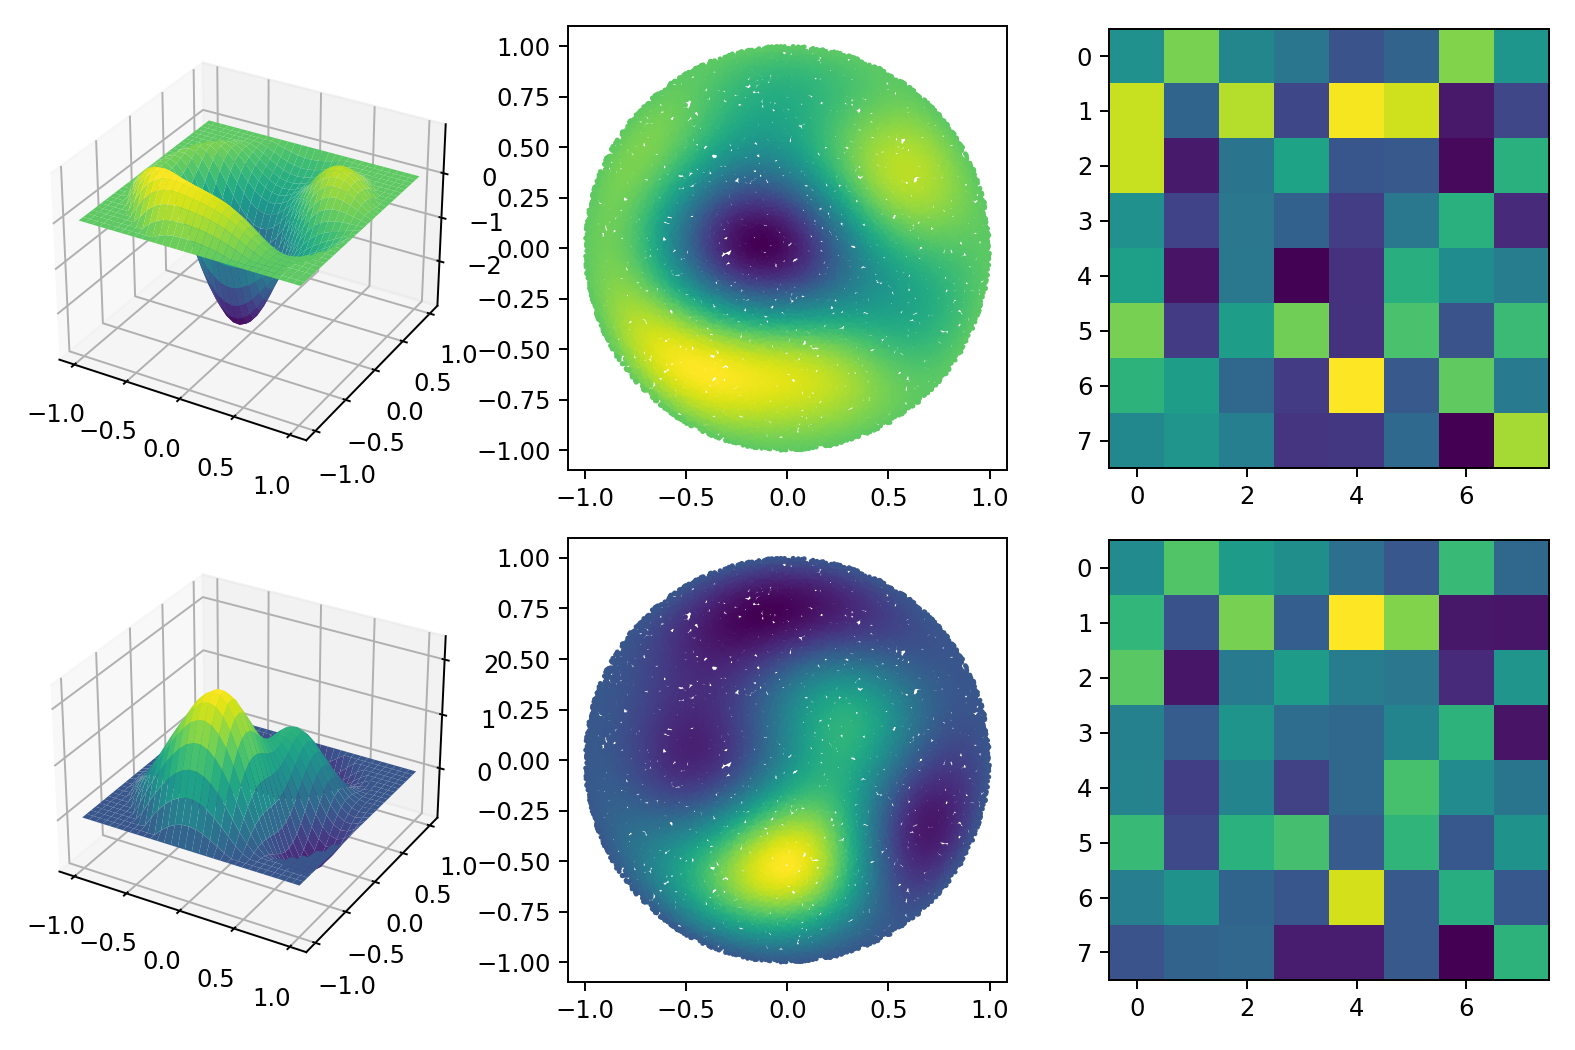

torch.Size([64, 32768])
torch.Size([64, 32768])
0.8407554030418396


In [107]:
fig, axis = plt.subplots(2,3, figsize=(9,6), sharex = False, sharey = False, squeeze = False)

nx3d = 32
ny3d = nx3d
x3d = np.linspace(-1,1,nx3d)
y3d = np.linspace(-1,1,ny3d)
xv, yv = np.meshgrid(x3d, y3d)

sigma = 2 / np.sqrt(len(centers))
sigma = 0.5


Z = xv * 0

for i, (w,c) in enumerate(zip(weights,centers)):
    T = w * np.exp(-(xv-c[0])**2/sigma**2) * np.exp(-(yv-c[1])**2/sigma**2)
    T[xv**2 + yv**2 > 1] = 0    
    Z = Z + T
    
Zc = np.exp(-(xv)**2/sigma**2) * np.exp(-(yv)**2/sigma**2)
r = np.sqrt(xv**2 + yv**2)
Zc = 1-r**2
Zc[xv**2 + yv**2 > 1] = 0
Z = Z * Zc


integrals = []
for i, (w,c) in enumerate(zip(weights,centers)):
    integral = torch.exp(-(x-c[0])**2/sigma**2) * torch.exp(-(y-c[1])**2/sigma**2)
    integral[x**2 + y**2 > 1] = 0
    integrals.append(np.pi * torch.sum(integral) / nmc)
integrals = torch.stack(integrals)


baseIntegrals = []
for i, (w,c) in enumerate(zip(weights,centers)):
    baseIntegral = torch.exp(-(x-c[0])**2/sigma**2) * torch.exp(-(y-c[1])**2/sigma**2)
    baseIntegral[x**2 + y**2 > 1] = 0
    baseIntegrals.append(baseIntegral.flatten())
baseIntegrals = torch.stack(baseIntegrals)
print(baseIntegrals.shape)

shapeFunction = 1 - torch.sqrt(x**2 + y**2)**2
shapeFunction = shapeFunction.flatten()

def evalFn(weights):
    wSum = weights[:,None] * baseIntegrals
    wSum = torch.sum(wSum, dim = 0)
    return wSum * shapeFunction
#     print(wSum.shape)
def integrate(x):
    return (np.pi * torch.sum(evalFn(torch.from_numpy(x).to('cuda').type(torch.float32)))/nmc).cpu().item()

fn = evalFn(torch.from_numpy(weights).to('cuda').type(torch.float32))

a = make3D(axis[0,0])
a.plot_surface(xv, yv, Z,cmap = cm.viridis)
axis[0,1].scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(), s = 1, c = fn.detach().cpu().numpy())
axis[0,1].axis('equal')
axis[0,2].imshow(weights.reshape(nx,ny))
# axis[0,2].hist(fmc.detach().cpu().numpy(),density=True,bins=32)

Z = xv * 0

for i, (w,c) in enumerate(zip(res.x,centers)):
    T = w * np.exp(-(xv-c[0])**2/sigma**2) * np.exp(-(yv-c[1])**2/sigma**2)
    T[xv**2 + yv**2 > 1] = 0    
    Z = Z + T
    
Zc = np.exp(-(xv)**2/sigma**2) * np.exp(-(yv)**2/sigma**2)
r = np.sqrt(xv**2 + yv**2)
Zc = 1-r**2
Zc[xv**2 + yv**2 > 1] = 0
Z = Z * Zc


integrals = []
for i, (w,c) in enumerate(zip(res.x,centers)):
    integral = torch.exp(-(x-c[0])**2/sigma**2) * torch.exp(-(y-c[1])**2/sigma**2)
    integral[x**2 + y**2 > 1] = 0
    integrals.append(np.pi * torch.sum(integral) / nmc)
integrals = torch.stack(integrals)


baseIntegrals = []
for i, (w,c) in enumerate(zip(res.x,centers)):
    baseIntegral = torch.exp(-(x-c[0])**2/sigma**2) * torch.exp(-(y-c[1])**2/sigma**2)
    baseIntegral[x**2 + y**2 > 1] = 0
    baseIntegrals.append(baseIntegral.flatten())
baseIntegrals = torch.stack(baseIntegrals)
print(baseIntegrals.shape)

shapeFunction = 1 - torch.sqrt(x**2 + y**2)**2
shapeFunction = shapeFunction.flatten()

def evalFn(weights):
    wSum = weights[:,None] * baseIntegrals
    wSum = torch.sum(wSum, dim = 0)
    return wSum * shapeFunction
#     print(wSum.shape)
def integrate(x):
    return (np.pi * torch.sum(evalFn(torch.from_numpy(x).to('cuda').type(torch.float32)))/nmc).cpu().item()

fn = evalFn(torch.from_numpy(res.x).to('cuda').type(torch.float32))

a = make3D(axis[1,0])
a.plot_surface(xv, yv, Z,cmap = cm.viridis)
axis[1,1].scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(), s = 1, c = fn.detach().cpu().numpy())
axis[1,1].axis('equal')
axis[1,2].imshow(res.x.reshape(nx,ny))

fig.tight_layout()

print(integrate(res.x))